## DSC 550 Titanic Case Study Part 1 Scroggins Jonathon

In [1]:
import pandas as pd
import yellowbrick
import matplotlib.pyplot as plt
import numpy as np

### Titanic Case Study Part 1 begins here

In [2]:
#Step 1: Load df
titanic_df = pd.read_csv('train.csv')

In [3]:
#Step 2: shape of the dataframe
print('The dimensions of the titanic dataframe is: ', titanic_df.shape)

The dimensions of the titanic dataframe is:  (891, 12)


In [4]:
#Step 3: Head of the data
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


*Step 4: exploring the variables and questions*

In [5]:
#What types are the variables?
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
#unique cabins?
titanic_df['Cabin'].describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

*Were females more likely to survive since the thought would be women and children first?*

*Did the class of passenger help with survival rate as in higher or lower class more likely to survive?*

In [7]:
#Step 5 summary of data
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",male,347082,G6,S
freq,1,577,7,4,644


#### *After looking at the summaries, I think there are a few questions that I come up with:*

*What does the 3 different values for embark mean and do they make a difference on the survival rate, though there were mostly S's so I am not sure what effect they have.*

*After looking at the mean of the survived I see that it looks as if ony 38% survived the Titanic*

*The average age is really low, so I wonder what effect age will have on the results*


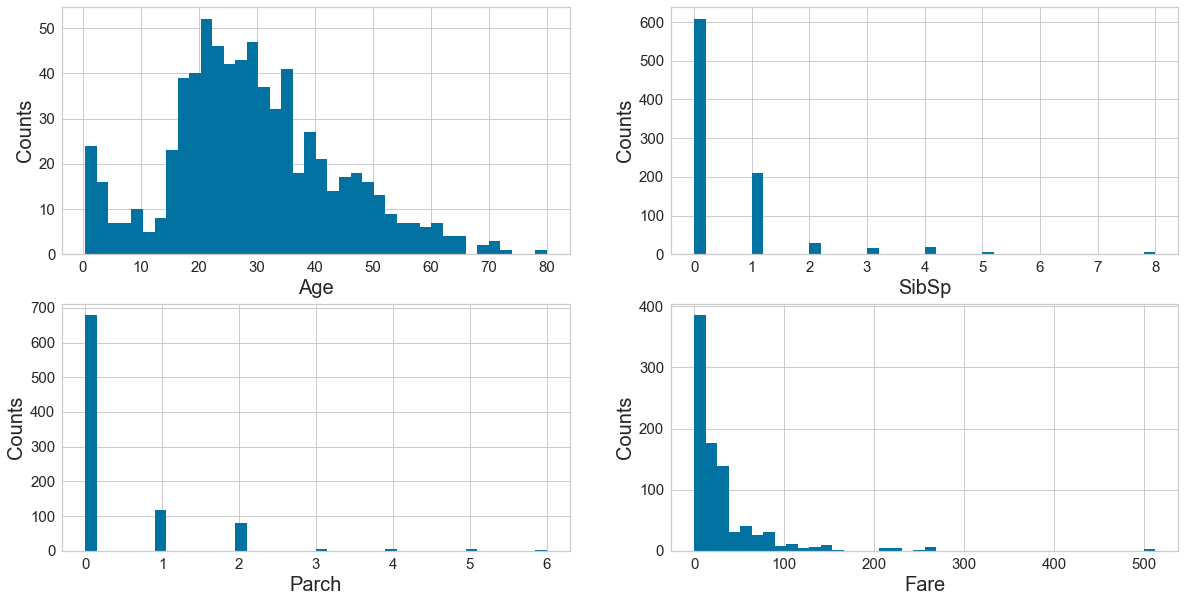

In [9]:
#plotting histograms
plt.rcParams['figure.figsize'] = (20,10) 
#set up histograms
fig, axes = plt.subplots(nrows= 2, ncols = 2)
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']
#draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(titanic_df[num_features[idx]].dropna(), bins=40) 
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()
                 

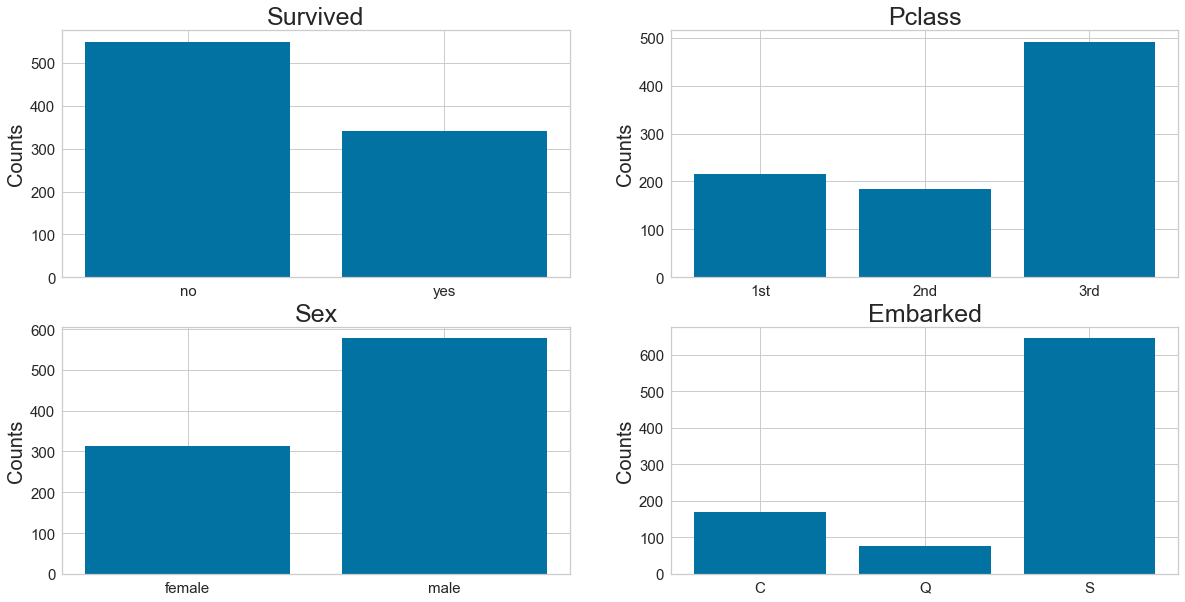

In [10]:
#plotting barcharts
plt.rcParams['figure.figsize'] = (20,10) 
#set up barcharts
#Bar chart for Survived
fig, axes = plt.subplots(nrows= 2, ncols = 2)
X_Survived = titanic_df.replace({'Survived':{1:'yes', 0:'no'}}).groupby('Survived').size().reset_index(name='Counts')['Survived']
Y_Survived = titanic_df.replace({'Survived':{1:'yes', 0:'no'}}).groupby('Survived').size().reset_index(name='Counts')['Counts']
axes[0,0].bar(X_Survived, Y_Survived) #[0,0] means position of bar chart
axes[0,0].set_title('Survived', fontsize = 25)
axes[0,0].set_ylabel('Counts', fontsize = 20)
axes[0,0].tick_params(axis='both', labelsize = 15)

#Bar chart for Pclass
X_Pclass = titanic_df.replace({'Pclass': {1:'1st', 2:'2nd', 3:'3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Pclass']
Y_Pclass = titanic_df.replace({'Pclass': {1:'1st', 2:'2nd', 3:'3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Counts']
axes[0,1].bar(X_Pclass, Y_Pclass) #[0,1] means position of bar chart
axes[0,1].set_title('Pclass', fontsize = 25)
axes[0,1].set_ylabel('Counts', fontsize = 20)
axes[0,1].tick_params(axis='both', labelsize = 15)

#Bar chart for Sex
X_Sex = titanic_df.groupby('Sex').size().reset_index(name='Counts')['Sex']
Y_Sex = titanic_df.groupby('Sex').size().reset_index(name='Counts')['Counts']
axes[1,0].bar(X_Sex, Y_Sex) #[1,0] means position of bar chart
axes[1,0].set_title('Sex', fontsize = 25)
axes[1,0].set_ylabel('Counts', fontsize = 20)
axes[1,0].tick_params(axis='both', labelsize = 15)

#Bar chart for Embark
X_Embarked = titanic_df.groupby('Embarked').size().reset_index(name='Counts')['Embarked']
Y_Embarked = titanic_df.groupby('Embarked').size().reset_index(name='Counts')['Counts']
axes[1,1].bar(X_Embarked, Y_Embarked) #[1,1] means position of bar chart
axes[1,1].set_title('Embarked', fontsize = 25)
axes[1,1].set_ylabel('Counts', fontsize = 20)
axes[1,1].tick_params(axis='both', labelsize = 15)

plt.show()

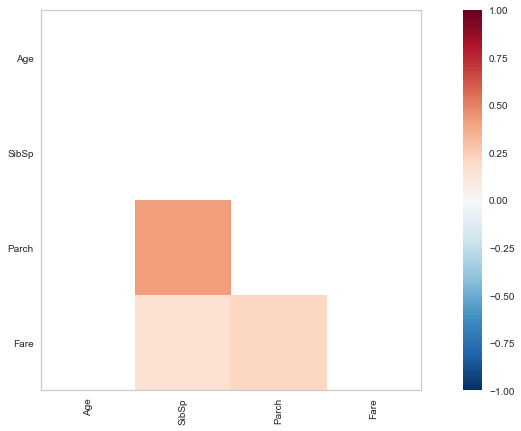

In [11]:
#Pearson Ranking charts
plt.rcParams['figure.figsize'] = (15,7)
from yellowbrick.features import Rank2D
X = titanic_df[num_features].values
visulizer = Rank2D(features=num_features, algorithm='pearson')
visulizer.fit(X)
visulizer.transform(X)
plt.show()


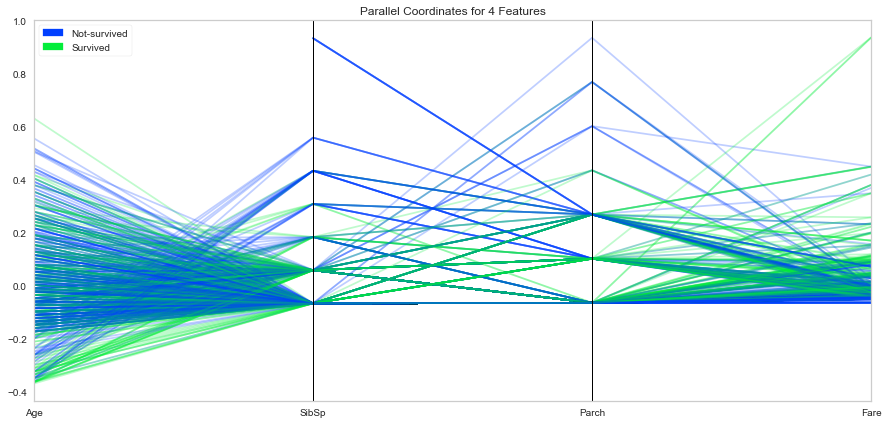

<AxesSubplot:title={'center':'Parallel Coordinates for 4 Features'}>

In [12]:
#Comapring variables against survived/not survived
plt.rcParams['figure.figsize'] = (15,7)
plt.rcParams['font.size'] = 50
from yellowbrick.style import set_palette
set_palette('sns_bright')
from yellowbrick.features import ParallelCoordinates
classes = ['Not-survived', 'Survived']
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
titanic_df_norm = titanic_df.copy()
for feature in num_features:
    titanic_df_norm[feature] = (titanic_df[feature] - titanic_df[feature].mean(skipna= True))/(titanic_df[feature].max(skipna=True)-titanic_df[feature].min(skipna= True))
    
X = titanic_df_norm[num_features].values
y = titanic_df.Survived

visulizer = ParallelCoordinates(classes=classes, features=num_features)
visulizer.fit(X,y)
visulizer.transform(X)
visulizer.show()

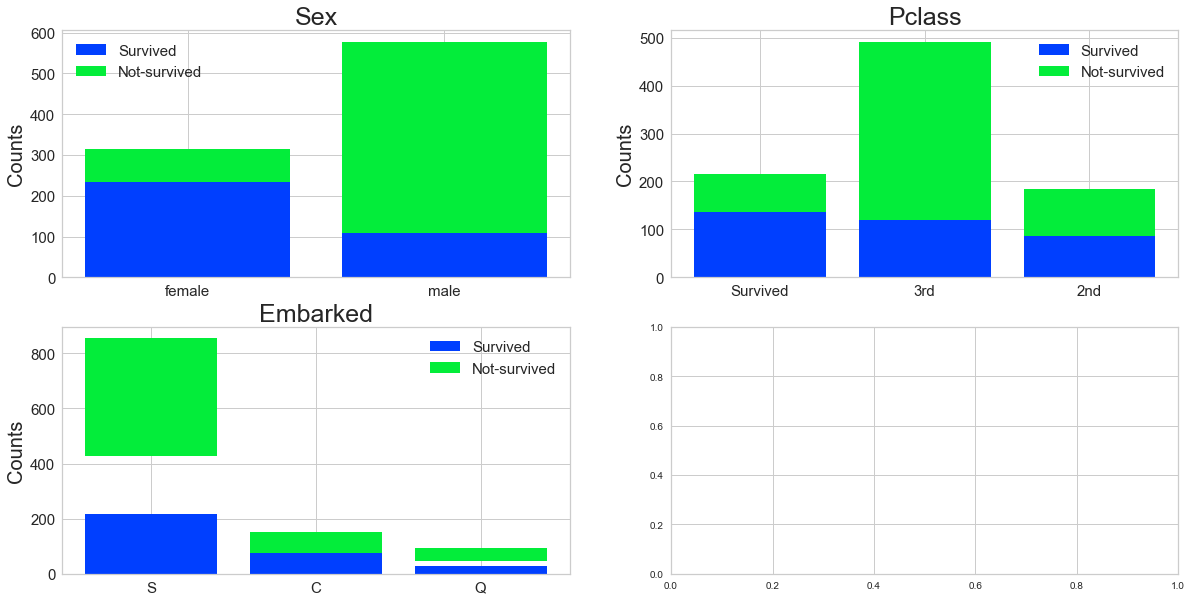

In [13]:
#Stacked bar charts
plt.rcParams['figure.figsize'] = (20,10)
fig, axes = plt.subplots(nrows=2, ncols=2)

Sex_survived = titanic_df.replace({'Survived':{1:'Survived', 0:'Not-survived'}})[titanic_df['Survived']==1]['Sex'].value_counts()
Sex_not_survived = titanic_df.replace({'Survived':{1:'Survived', 0:'Not-survived'}})[titanic_df['Survived']==0]['Sex'].value_counts()
Sex_not_survived = Sex_not_survived.reindex(index = Sex_survived.index)
p1=axes[0,0].bar(Sex_survived.index, Sex_survived.values)
p2=axes[0,0].bar(Sex_not_survived.index, Sex_not_survived.values, bottom=Sex_survived.values)
axes[0,0].set_title('Sex', fontsize=25)
axes[0,0].set_ylabel('Counts', fontsize=20)
axes[0,0].tick_params(axis='both', labelsize=15)
axes[0,0].legend((p1[0], p2[0]),('Survived', 'Not-survived'), fontsize=15)


Pclass_survived = titanic_df.replace({'Pclass':{1:'Survived', 0:'Not-survived'}}).replace({'Pclass':{1:'1st', 2:'2nd', 3:'3rd'}})[titanic_df['Survived']==1]['Pclass'].value_counts()
Pclass_not_survived = titanic_df.replace({'Pclass':{1:'Survived', 0:'Not-survived'}}).replace({'Pclass':{1:'1st', 2:'2nd', 3:'3rd'}})[titanic_df['Survived']==0]['Pclass'].value_counts()
Pclass_not_survived = Pclass_not_survived.reindex(index = Pclass_survived.index)
p3=axes[0,1].bar(Pclass_survived.index, Pclass_survived.values)
p4=axes[0,1].bar(Pclass_not_survived.index, Pclass_not_survived.values, bottom=Pclass_survived.values)
axes[0,1].set_title('Pclass', fontsize=25)
axes[0,1].set_ylabel('Counts', fontsize=20)
axes[0,1].tick_params(axis='both', labelsize=15)
axes[0,1].legend((p3[0], p4[0]),('Survived', 'Not-survived'), fontsize=15)

Embarked_survived = titanic_df.replace({'Survived':{1:'Survived', 0:'Not-survived'}})[titanic_df['Survived']==1]['Embarked'].value_counts()
Embarked_not_survived = titanic_df.replace({'Survived':{1:'Survived', 0:'Not-survived'}})[titanic_df['Survived']==0]['Embarked'].value_counts()
Embarked_not_survived = Embarked_not_survived.reindex(index = Embarked_survived.index)
p5=axes[1,0].bar(Embarked_survived.index, Embarked_survived.values)
p6=axes[1,0].bar(Embarked_not_survived.index, Embarked_not_survived.values, bottom=Embarked_not_survived.values)
axes[1,0].set_title('Embarked', fontsize=25)
axes[1,0].set_ylabel('Counts', fontsize=20)
axes[1,0].tick_params(axis='both', labelsize=15)
axes[1,0].legend((p5[0], p6[0]),('Survived', 'Not-survived'), fontsize=15)

plt.show()

### Titanic Case Study Part 2 begins here

In [14]:
#drop unnecessary features
titanic_df = titanic_df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)

In [15]:
#fill Age with the Mean
age_mean = round(titanic_df.Age.mean(), 0)
age_mean

30.0

In [16]:
titanic_df['Age'].fillna(value=age_mean, inplace=True)
titanic_df['Age'].describe()

count    891.000000
mean      29.758889
std       13.002570
min        0.420000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [17]:
#fill na with mode
embark_mode = titanic_df['Embarked'].mode()
embark_mode

0    S
dtype: object

In [18]:
titanic_df['Embarked'].fillna(value= 'S', inplace=True)
titanic_df['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

In [19]:
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [20]:
#log transform Fare
titanic_df['Fare_log'] = np.log1p(titanic_df['Fare'])
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_log
0,0,3,male,22.0,1,0,7.2500,S,2.110213
1,1,1,female,38.0,1,0,71.2833,C,4.280593
2,1,3,female,26.0,0,0,7.9250,S,2.188856
3,1,1,female,35.0,1,0,53.1000,S,3.990834
4,0,3,male,35.0,0,0,8.0500,S,2.202765
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,2.639057
887,1,1,female,19.0,0,0,30.0000,S,3.433987
888,0,3,female,30.0,1,2,23.4500,S,3.196630
889,1,1,male,26.0,0,0,30.0000,C,3.433987


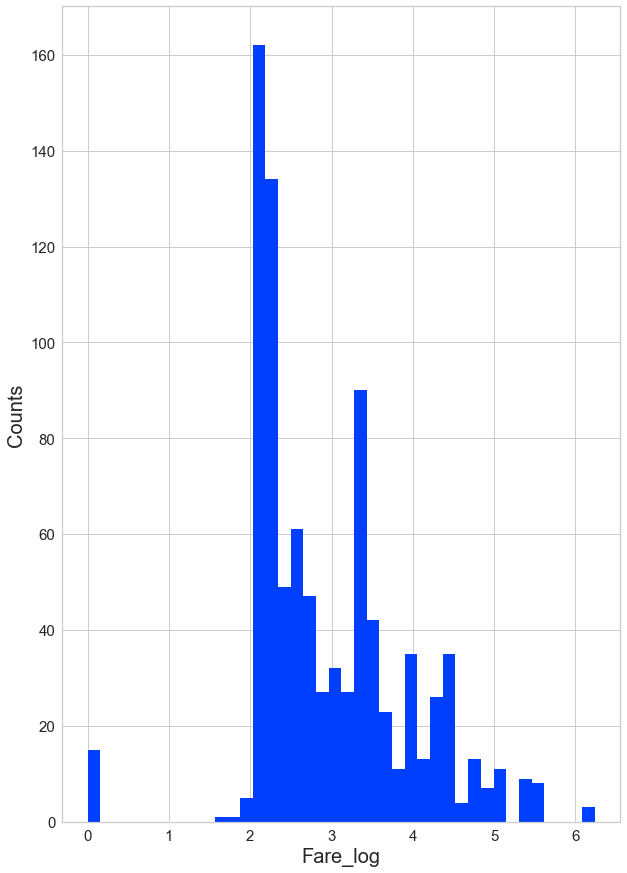

In [21]:
plt.rcParams['figure.figsize'] = (10,15)
plt.hist(titanic_df['Fare_log'], bins=40)
plt.xlabel('Fare_log', fontsize = 20)
plt.ylabel('Counts', fontsize = 20)
plt.tick_params(axis='both', labelsize = 15)
plt.show()

In [22]:
#convert categorical data
cat_features = ['Pclass', 'Sex', 'Embarked']
titanic_df_cat = titanic_df[cat_features]
titanic_df_cat = titanic_df_cat.replace({'Pclass':{1:'1st', 2:'2nd', 3:'3rd'}})
titanic_df_cat_dummies = pd.get_dummies(titanic_df_cat)
titanic_df_cat_dummies.head(8)

,Pclass_1st,Pclass_2nd,Pclass_3rd,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1
5,0,0,1,0,1,0,1,0
6,1,0,0,0,1,0,0,1
7,0,0,1,0,1,0,0,1


In [23]:
#combine to one dataframe
titanic_df = pd.concat([titanic_df, titanic_df_cat_dummies], axis=1)
titanic_df.head(8)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_log,Pclass_1st,Pclass_2nd,Pclass_3rd,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,S,2.110213,0,0,1,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,4.280593,1,0,0,1,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,2.188856,0,0,1,1,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,3.990834,1,0,0,1,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,2.202765,0,0,1,0,1,0,0,1
5,0,3,male,30.0,0,0,8.4583,Q,2.246893,0,0,1,0,1,0,1,0
6,0,1,male,54.0,0,0,51.8625,S,3.967694,1,0,0,0,1,0,0,1
7,0,3,male,2.0,3,1,21.0750,S,3.094446,0,0,1,0,1,0,0,1


### Milestone 3 Begins here

In [34]:
#df with only features
titanic_df_features = ['Age', 'SibSp', 'Parch', 'Fare_log']

In [35]:
#features and dummies
titanic_df_model = pd.concat([titanic_df[titanic_df_features], titanic_df_cat_dummies], axis=1)
titanic_df_ymodel = titanic_df.replace({'Survived': {1: 'Survived', 0: 'Not_survived'}})['Survived']

In [36]:
#train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(titanic_df_model, titanic_df_ymodel, test_size = 0.3, random_state = 11)

In [37]:
print('The number of samples in the trianing set is: ', X_train.shape[0])
print('The number of samples in the validation set is: ', X_test.shape[0])

The number of samples in the trianing set is:  623
The number of samples in the validation set is:  268


In [38]:
print('Survived vs not survived in training set: ', y_train.value_counts())
print('Survived vs not survived in validation set: ', y_test.value_counts())

Survived vs not survived in training set:  Not_survived    373
Survived        250
Name: Survived, dtype: int64
Survived vs not survived in validation set:  Not_survived    176
Survived         92
Name: Survived, dtype: int64


In [39]:
#Making the logistic regression maodel
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

model = LogisticRegression()
classes = ['Not_survived', 'Survived']
cm = ConfusionMatrix(model, classes=classes)

The confusion matrix score is:  0.84


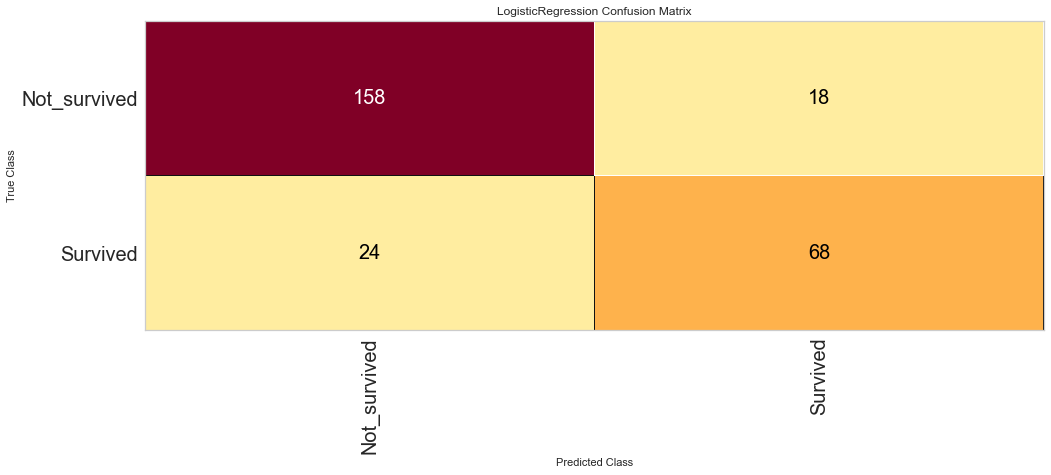

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [40]:
#fitting the model
cm.fit(X_train, y_train)
score = cm.score(X_test, y_test)
print('The confusion matrix score is: ', round(score, 2))
for label in cm.ax.texts:
    label.set_size(20)
cm.poof()

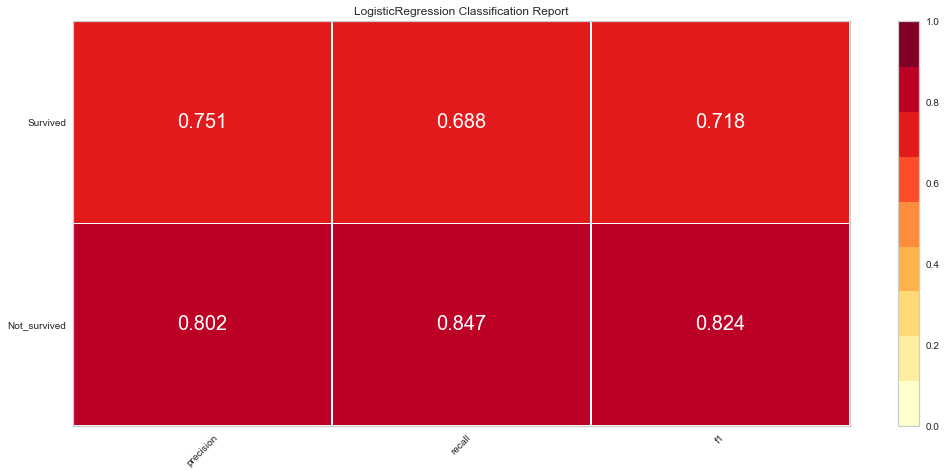

In [31]:
#Precision, Recall and F1
plt.rcParams['figure.figsize'] = (15,7)
plt.rcParams['font.size'] = 20
visualizer = ClassificationReport(model, classes = classes)
visualizer.fit(X_train, y_train)
visualizer.score(X_train, y_train)
g=visualizer.poof()

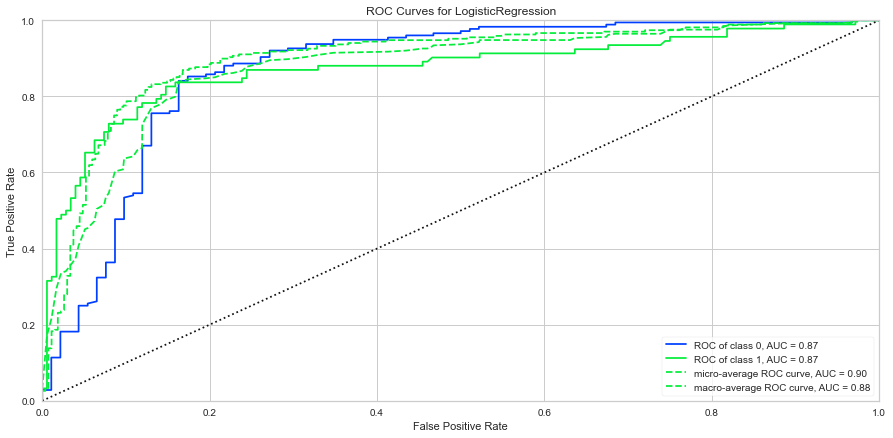

In [32]:
#ROC and AUC
titanic_df_ymodel_r = titanic_df.Survived
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(titanic_df_model, titanic_df_ymodel_r, test_size = 0.3, random_state = 11)
model_r = LogisticRegression()
visual = ROCAUC(model_r)
visual.fit(X_train_r, y_train_r)
visual.score(X_test_r, y_test_r)
g=visual.poof()